In [11]:
import urllib.parse
urllib.parse.quote_plus("")

from sqlalchemy import create_engine
connection_string = "postgres:Gwnomer28!@localhost:5432/Employees_db"
engine = create_engine(f'postgresql://{connection_string}')
conn = engine.connect()


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
salary_data = pd.read_sql('select * from salaries', conn)
salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [14]:
from scipy import stats
stats.mode(salary_data["salary"].values)

ModeResult(mode=array([40000], dtype=int64), count=array([95346]))

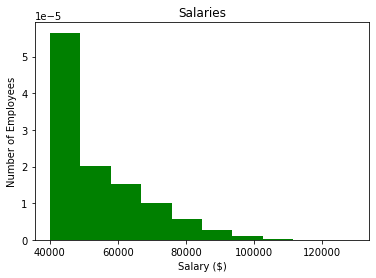

In [15]:
plt.hist(salary_data['salary'], histtype="bar", facecolor='g', density=True)   
plt.title("Salaries")
plt.xlabel("Salary ($)")
plt.ylabel("Number of Employees")
plt.show()


In [16]:
employee_data = pd.read_sql('select emp_no, emp_title_id from employees', conn)
employee_data

,emp_no,emp_title_id
0,473302,s0001
1,475053,e0002
2,57444,e0002
3,421786,s0001
4,282238,e0003
...,...,...
300019,464231,s0001
300020,255832,e0002
300021,76671,s0001
300022,264920,s0001


In [17]:
title_id_data = pd.read_sql('select * from titles', conn)
title_id_data

,emp_title_id,title
0,﻿emp_title_id,title
1,s0001,Staff
2,s0002,Senior Staff
3,e0001,Assistant Engineer
4,e0002,Engineer
5,e0003,Senior Engineer
6,e0004,Technique Leader
7,m0001,Manager


In [18]:
total_data = pd.read_sql('''SELECT salaries.emp_no, salaries.salary, employees.emp_title_id, titles.title 
                            FROM salaries JOIN employees on salaries.emp_no=employees.emp_no 
                            JOIN titles on employees.emp_title_id=titles.emp_title_id''', conn)
                         
total_data

,emp_no,salary,emp_title_id,title
0,10005,78228,s0001,Staff
1,10010,72488,e0002,Engineer
2,10011,42365,s0001,Staff
3,10018,55881,e0003,Senior Engineer
4,10035,41538,e0003,Senior Engineer
...,...,...,...,...
300019,499963,49383,e0003,Senior Engineer
300020,499972,41002,e0003,Senior Engineer
300021,499985,40000,s0001,Staff
300022,499987,52282,s0001,Staff


In [19]:
average_salary =  total_data.groupby('title')['salary'].mean()

Text(0, 0.5, 'Average Salary')

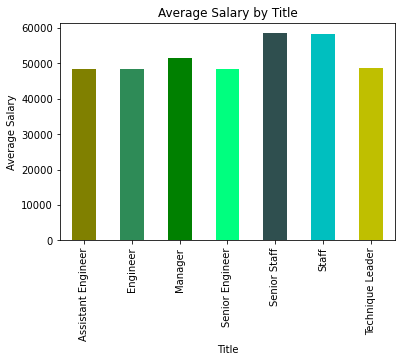

In [22]:
ax = average_salary.plot(kind='bar', x='Title', y='Average Employee Salary', title='Average Salary by Title', color=["olive", "seagreen", "g", "springgreen", "darkslategray", "c", "y"])
ax.set_xlabel("Title")
ax.set_ylabel("Average Salary")